### Deep Neural Network with Early stopping using Keras

In [25]:
import tensorflow as tf

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

import random
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [26]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [27]:
mnist = tf.keras.datasets.mnist

(Xtrain, Ytrain), (Xtest, Ytest) = mnist.load_data()

print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [28]:
# Normalize the data
# 60000 input images are in the train set.
# 10000 input images are in the test set.

Xtrain = Xtrain.reshape((60000, 28*28))    # reshape the input set to size 28*28. 
Xtrain = Xtrain.astype('float32')/255      # normalize to grayscale; set datatype as float32

Xtest = Xtest.reshape((10000, 28*28))      # reshape the input set to size 28*28. 
Xtest = Xtest.astype('float32')/255        # normalize to grayscale; set datatype as float32

Ytrain = tf.keras.utils.to_categorical(Ytrain)
Ytest = tf.keras.utils.to_categorical(Ytest)

#### DNN Model

In [29]:
dnnModel = models.Sequential()

In [30]:
# Layer 1 = input layer
dnnModel.add(layers.Dense(50, activation='relu', input_shape= (28*28,)))

# Layer 2 = hidden layer
dnnModel.add(layers.Dense(60, activation='relu'))

# Add dropout of 50% to layer 2
dnnModel.add(layers.Dropout(0.5))

# Layer 3 = hidden layer
dnnModel.add(layers.Dense(30, activation='relu'))

# Layer 4 = output layer
dnnModel.add(layers.Dense(10, activation='softmax'))

dnnModel.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 50)                  │          39,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 60)                  │           3,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 30)                  │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │             310 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,450 (173.63 KB)

 Trainable params: 44,450 (173.63 KB)

 Non-trainable params: 0 (0.00 B)

#### Regularization and Optimizations of DNN

In [31]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing. 

dnnModel.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

#### Early stopping and training

In [32]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

hes = dnnModel.fit(Xtrain, Ytrain, validation_split=0.2, epochs=25, verbose=0, callbacks=[es])

Epoch 5: early stopping


#### Plot of early stopping results

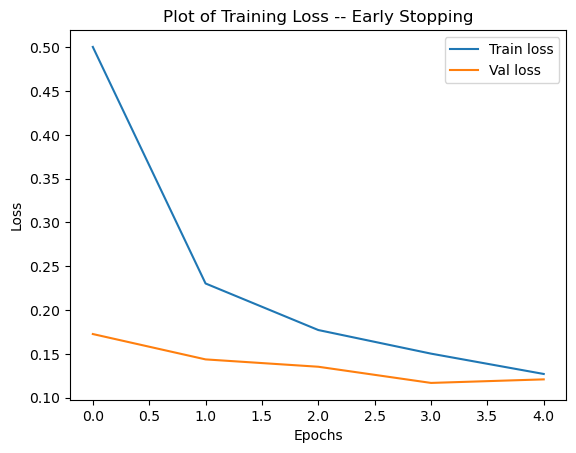

In [35]:
# plot the training loss

plt.plot(hes.history['loss'], label='Train loss')
plt.plot(hes.history['val_loss'], label='Val loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Loss -- Early Stopping')
plt.legend()
plt.show()

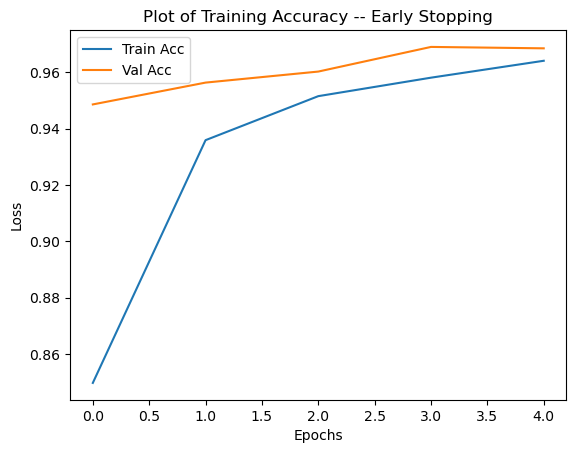

In [40]:
# Plot of training accuracy

plt.plot(hes.history['accuracy'], label='Train Acc')
plt.plot(hes.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Accuracy -- Early Stopping')
plt.legend()
plt.show()

#### Testing the model

In [33]:
test_loss, test_accuracy = dnnModel.evaluate(Xtest, Ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9663 - loss: 0.1216


In [34]:
print('Test loss \t', test_loss)
print('Testing accuracy', test_accuracy)

Test loss 	 0.10741669684648514
Testing accuracy 0.9699000120162964
